# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

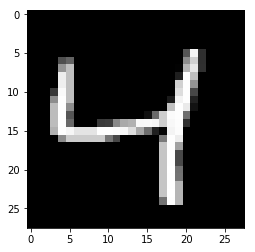

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6848
Epoch: 1/20... Training loss: 0.6804
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6668
Epoch: 1/20... Training loss: 0.6619
Epoch: 1/20... Training loss: 0.6527
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6278
Epoch: 1/20... Training loss: 0.6159
Epoch: 1/20... Training loss: 0.6016
Epoch: 1/20... Training loss: 0.5877
Epoch: 1/20... Training loss: 0.5698
Epoch: 1/20... Training loss: 0.5552
Epoch: 1/20... Training loss: 0.5372
Epoch: 1/20... Training loss: 0.5223
Epoch: 1/20... Training loss: 0.4985
Epoch: 1/20... Training loss: 0.4785
Epoch: 1/20... Training loss: 0.4627
Epoch: 1/20... Training loss: 0.4447
Epoch: 1/20... Training loss: 0.4297
Epoch: 1/20... Training loss: 0.4213
Epoch: 1/20... Training loss: 0.4050
Epoch: 1/20... Training loss: 0.3882
Epoch: 1/20... Training loss: 0.3753
E

Epoch: 1/20... Training loss: 0.2013
Epoch: 1/20... Training loss: 0.2166
Epoch: 1/20... Training loss: 0.2063
Epoch: 1/20... Training loss: 0.2178
Epoch: 1/20... Training loss: 0.2065
Epoch: 1/20... Training loss: 0.2081
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.2057
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.2034
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.2023
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1988
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.2002
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.2021
Epoch: 1/20... Training loss: 0.2013
E

Epoch: 2/20... Training loss: 0.1626
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1663
Epoch: 2/20... Training loss: 0.1660
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1653
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1680
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1589
E

Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1453
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1466
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1403
E

Epoch: 4/20... Training loss: 0.1330
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1326
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1319
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1305
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1264
E

Epoch: 5/20... Training loss: 0.1204
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1258
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1229
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1212
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1216
Epoch: 5/20... Training loss: 0.1212
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1209
Epoch: 5/20... Training loss: 0.1186
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1230
Epoch: 5/20... Training loss: 0.1206
E

Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1142
E

Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1127
E

Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1013
E

Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1052
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1048
Epoch: 8/20... Training loss: 0.1002
E

Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0970
E

Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.1004
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0882
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

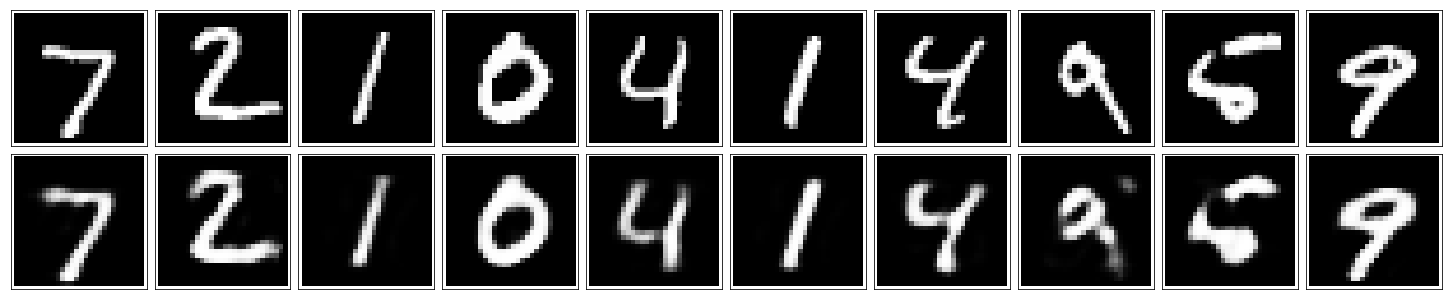

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.